In [ ]:
https://www.kaggle.com/nilimajauhari/glassdoor-analyze-gender-pay-gap

# Gender pay gap study

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(12,8)

In [6]:
# load and read data

pay = pd.read_csv('glassdoor-gender-pay-gap.csv')

In [7]:
# brief summary of data

pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
# brief overview of columns

pay.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [9]:
# convert column names to lower case

pay.columns = pay.columns.map(lambda x: x.lower())

In [10]:
# brief overview of column names

pay.columns

Index(['jobtitle', 'gender', 'age', 'perfeval', 'education', 'dept',
       'seniority', 'basepay', 'bonus'],
      dtype='object')

In [11]:
# brief overview of first 5 rows of data

pay.head()

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [12]:
# value counts of all unique values of jobtitle

pay.jobtitle.value_counts()

Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: jobtitle, dtype: int64

In [13]:
# compute basepay for females

fem_pay = pay.loc[pay['gender']=='Female','basepay']

In [14]:
# compute basepay for males
male_pay = pay.loc[pay['gender']=='Male','basepay']

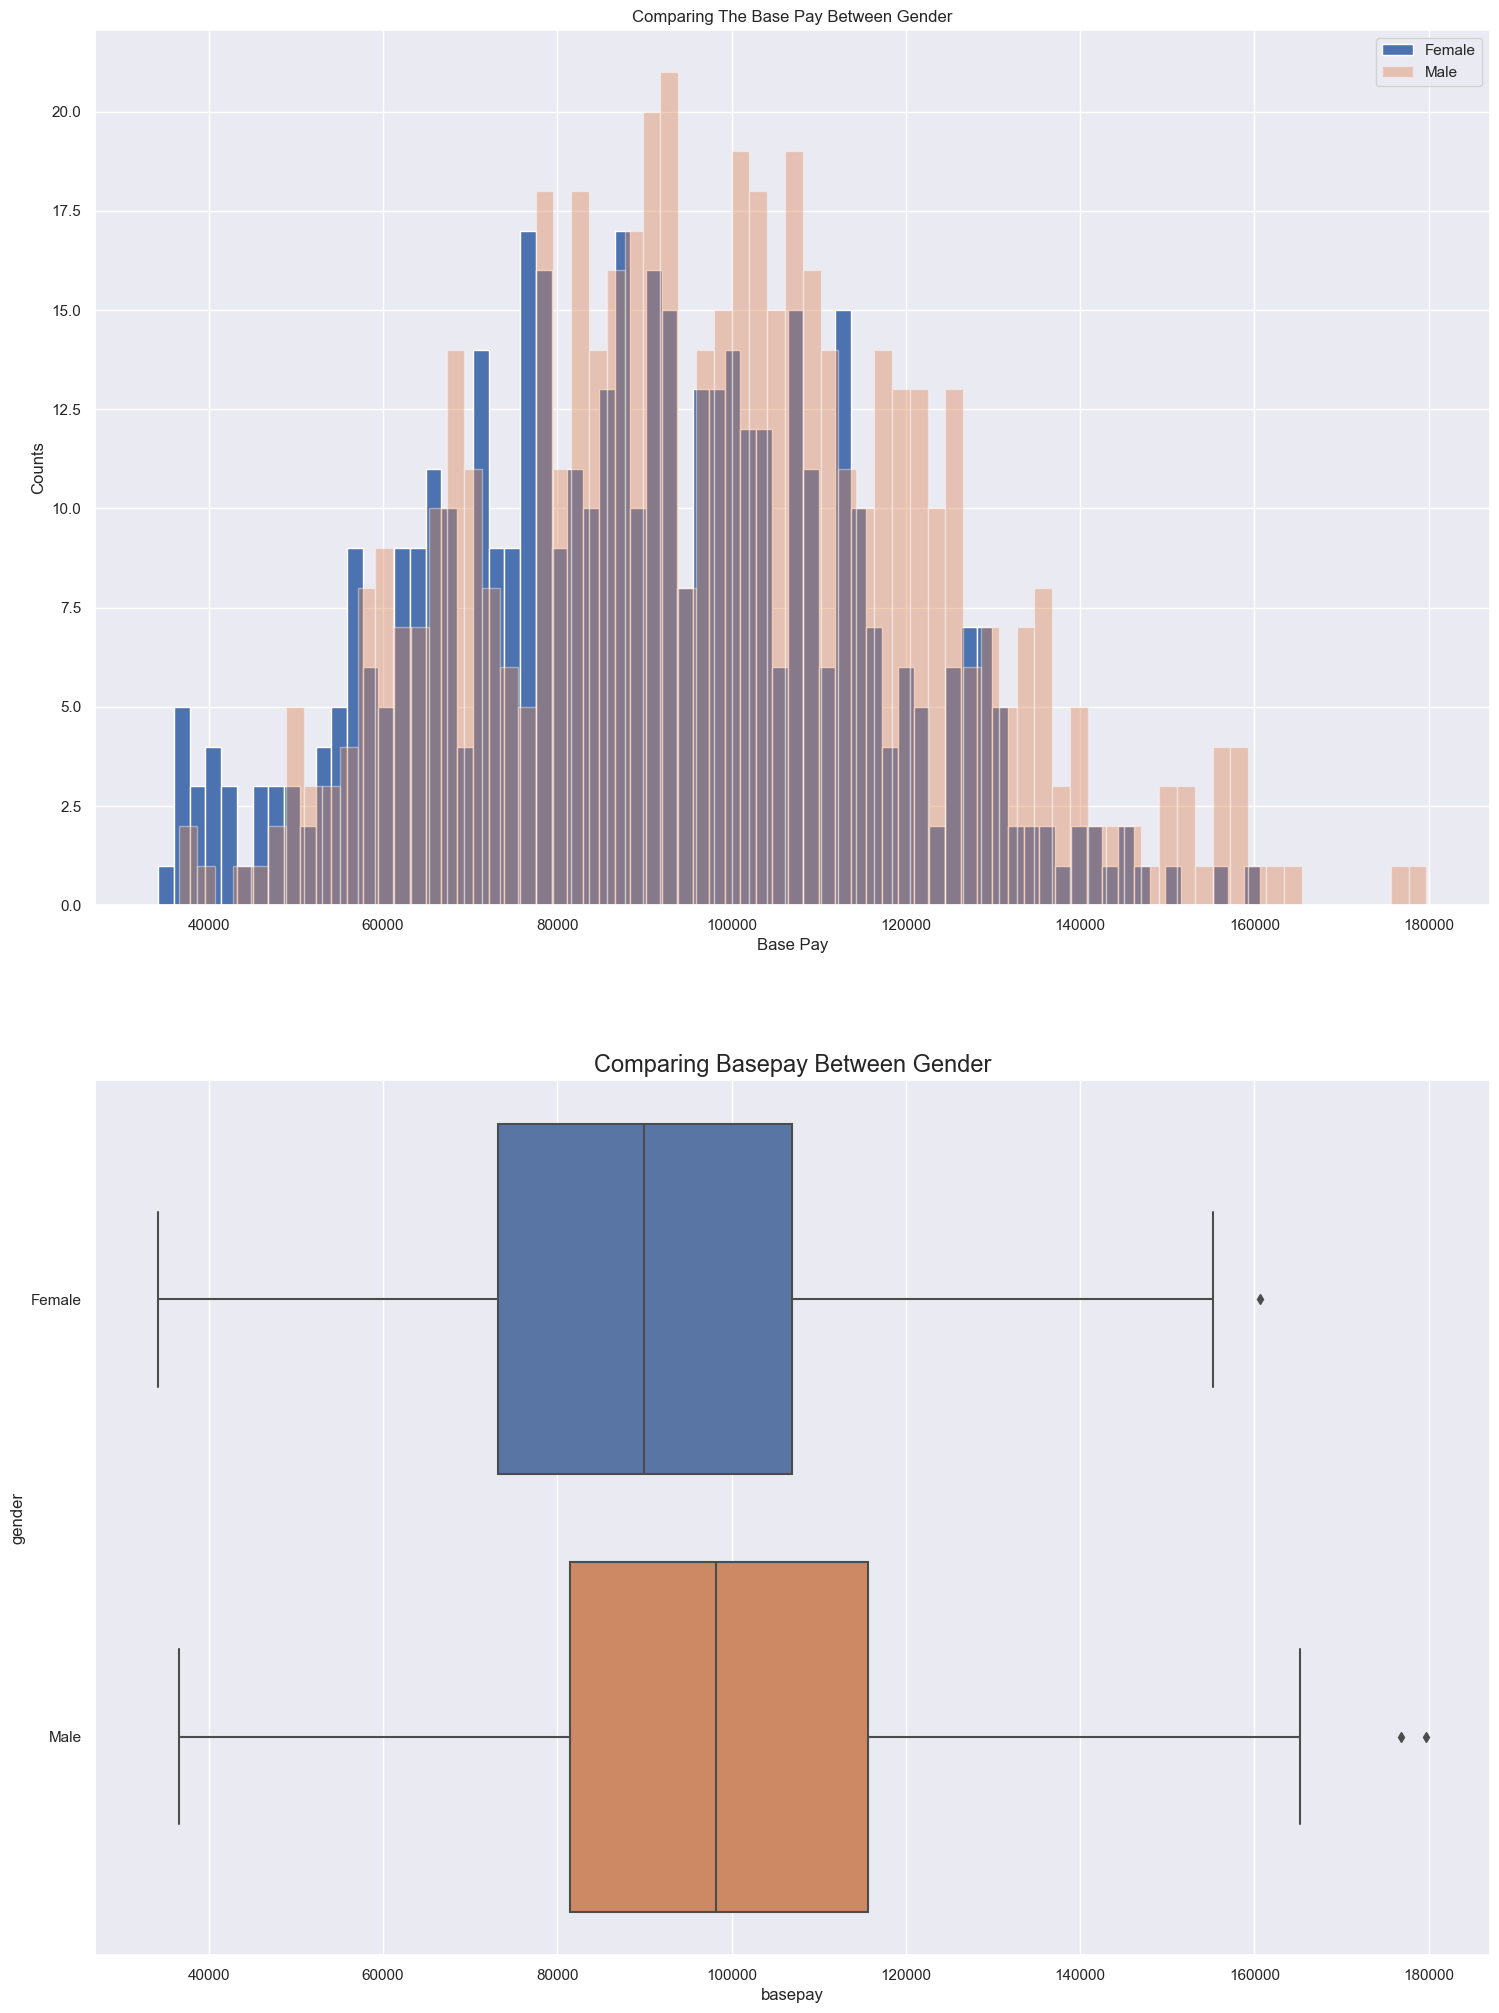

In [16]:
# compare average base pay according to gender 

fig=plt.gcf()
fig.set_size_inches(18,25)

plt.subplot(2,1,1)
fem_pay = pay.loc[pay['gender']=='Female','basepay'].hist(bins=70)
male_pay = pay.loc[pay['gender']=='Male','basepay'].hist(bins=70,alpha=.4)
plt.xlabel('Base Pay');
plt.ylabel('Counts');
plt.title('Comparing The Base Pay Between Gender');
plt.legend(['Female','Male']);


# using boxplot to visualize the difference in base pay between female and male
plt.subplot(2,1,2)
sns.boxplot(data = pay, y='gender', x='basepay');
plt.title('Comparing Basepay Between Gender', fontsize=17);

### Is the gender pay gap significant?  We will do a hypothesis testing to determine whether the pay gap is significant or not.
#### Null hypothesis: there are no gender pay gap
#### Alternative hypothesis: there is gender pay gap

In [17]:
# compute differences in average gender pay gap represented by p-value

a = pay.loc[pay['gender']=='Female','basepay']
b = pay.loc[pay['gender']=='Male','basepay']

t,p = stats.ttest_ind(a,b)
print(f" The P Value is: {p}, we reject null hypothesis.")

 The P Value is: 9.478621943012633e-08, we reject null hypothesis.


### Since the P value is < 0.05, we will reject the null hypothesis, and determine that the gender pay gap is significant, and cannot be dismissed as a myth!

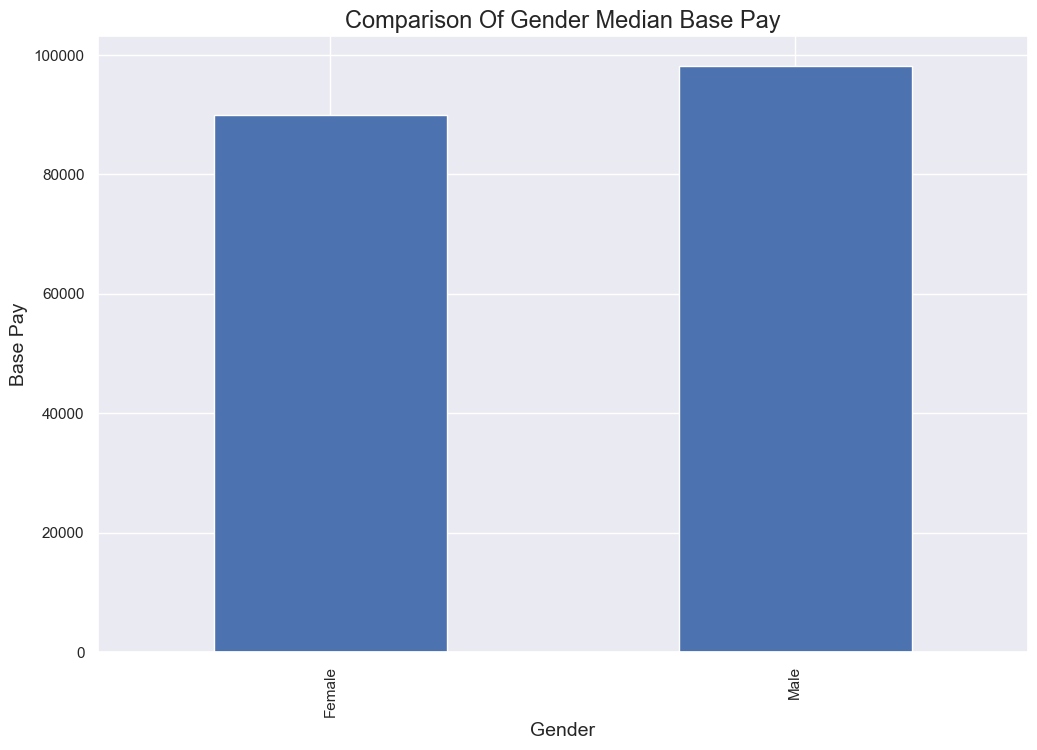

In [18]:
# Visualizing the gender pay gap with median basepay

pay.groupby('gender')['basepay'].median().plot(kind='bar');
plt.xlabel('Gender', fontsize=14);
plt.ylabel('Base Pay', fontsize=14);
plt.title('Comparison Of Gender Median Base Pay', fontsize=17);

### The gender pay gap is 8.46% or USD8,300 a year.

In [19]:
# computing the gender pay gap

gender_pay_both = pay.groupby('gender')['basepay'].median()
fem_pay = gender_pay_both.loc['Female']
mal_pay = gender_pay_both.loc['Male']

pay_diff = round(((mal_pay - fem_pay) / (mal_pay))*100,2)
print(f"The gender pay gap is {pay_diff}%")
print(f".....speaking of which the difference is ${mal_pay-fem_pay} a year")
print(f"The median basepay for female is ${fem_pay}")
print(f"The median basepay for male is ${mal_pay}....which is quite a big gap.")

The gender pay gap is 8.46%
.....speaking of which the difference is $8309.5 a year
The median basepay for female is $89913.5
The median basepay for male is $98223.0....which is quite a big gap.


### Let's try it out.....I am a Data Scientist with a Masters Degree and 41 years old...

The gender pay gap based on your context is 3.8%


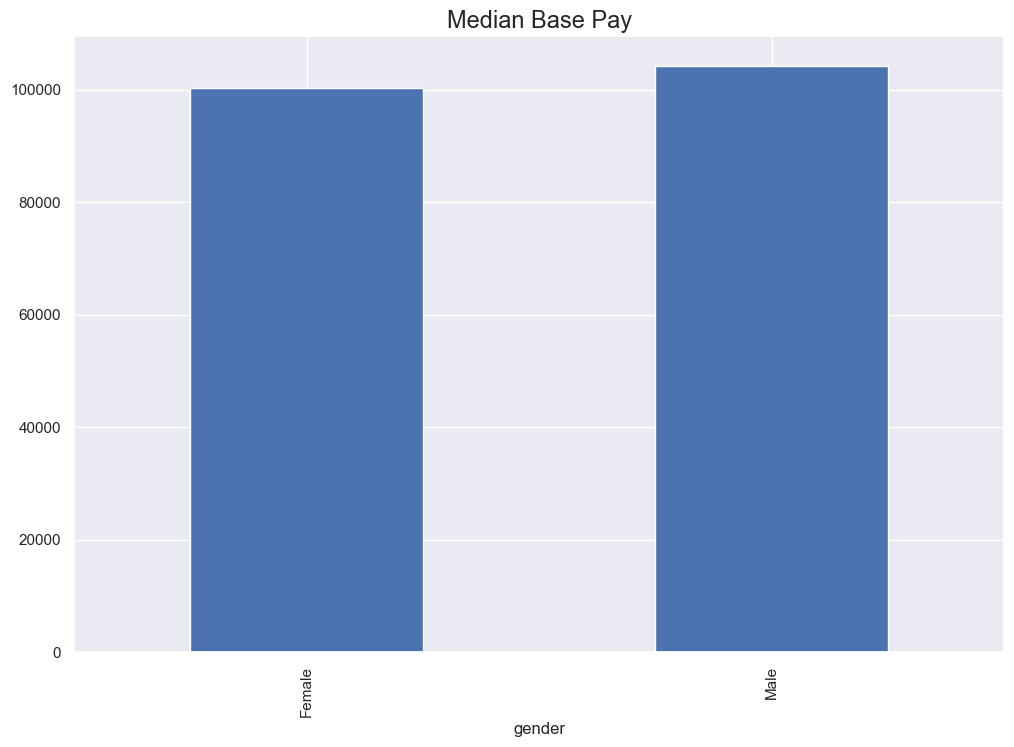

In [20]:
# I am a Data Scientist with a Masters Degree and 41 years old. Compute median gender pay gap.

yours = (pay['jobtitle']=='Data Scientist') & (pay['education']=='Masters') & (pay['age']>35) & (pay['age']<54)
your_pay = pay[yours].groupby('gender')['basepay'].median()
your_pay_gap = ((your_pay.loc['Male']-your_pay.loc['Female'])/your_pay.loc['Male'])*100
print(f"The gender pay gap based on your context is {your_pay_gap:.1f}%")
pay[yours].groupby('gender')['basepay'].median().plot.bar();
plt.title('Median Base Pay', fontsize=17);

### I am a financial analyst with a high school education and 38 years old

The gender pay gap based on your context is -31.7%


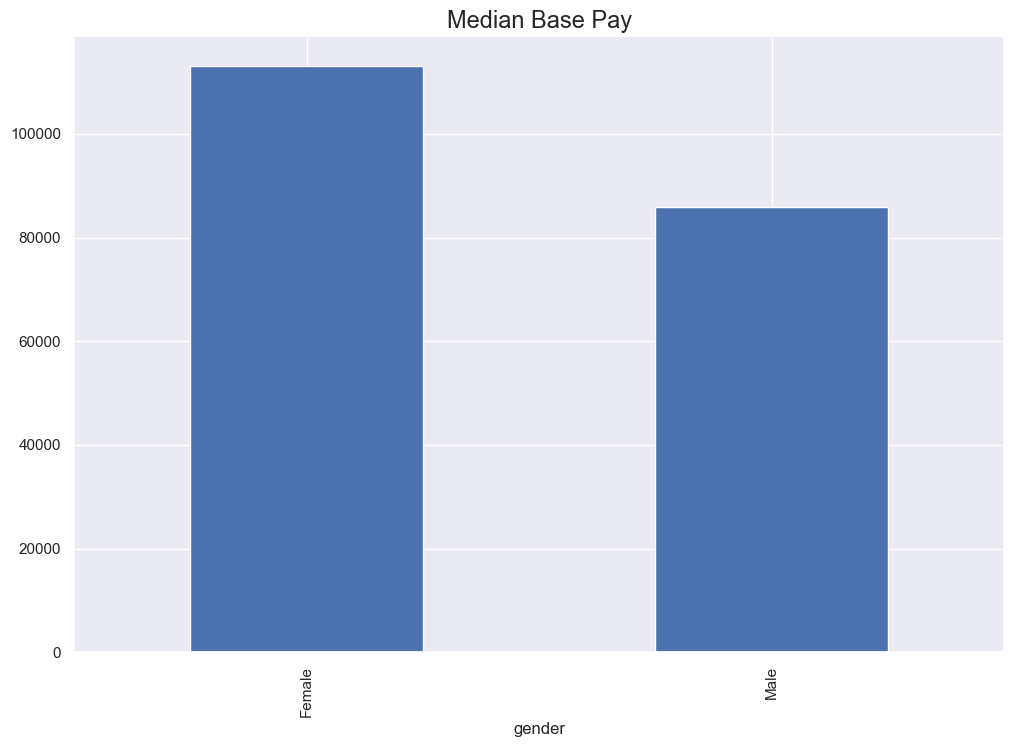

In [21]:
# I am a Financial Analyst with a High School education and 38 years old. Compute median gender pay gap.

yours = (pay['jobtitle']=='Financial Analyst') & (pay['education']=='High School') & (pay['age']>35) & (pay['age']<54)
your_pay = pay[yours].groupby('gender')['basepay'].median()
your_pay_gap = ((your_pay.loc['Male']-your_pay.loc['Female'])/your_pay.loc['Male'])*100
print(f"The gender pay gap based on your context is {your_pay_gap:.1f}%")
pay[yours].groupby('gender')['basepay'].median().plot.bar();
plt.title('Median Base Pay', fontsize=17);

### I am working in IT with a PhD and 50 years old

The gender pay gap based on your context is 1.6%


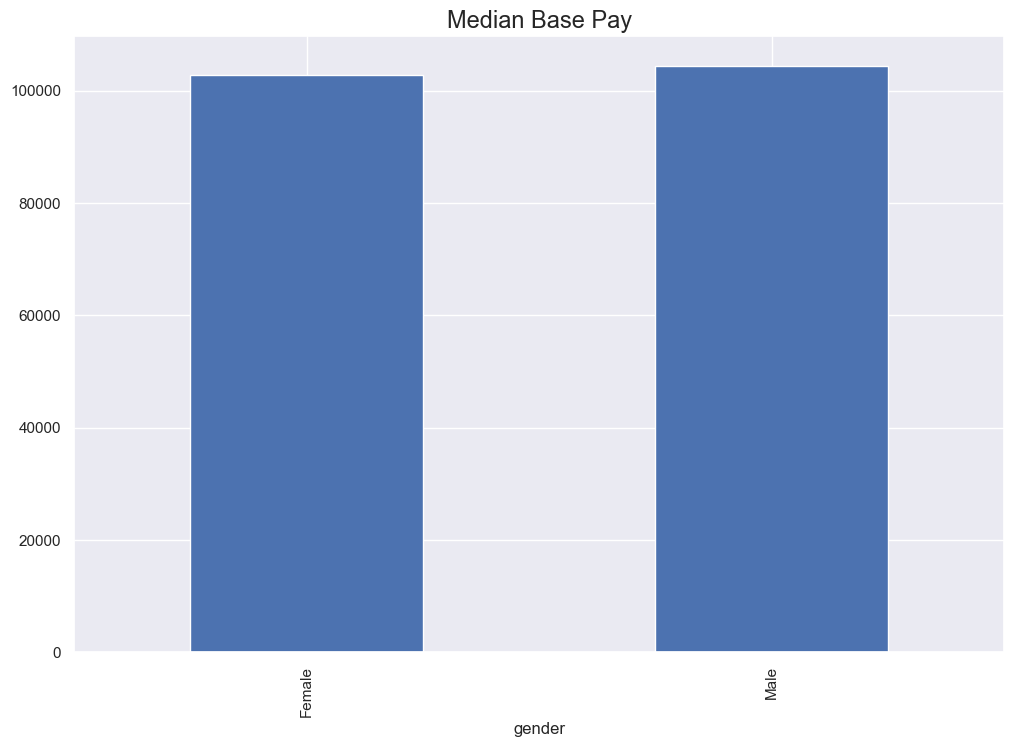

In [22]:
# I am working in IT with PhD and 50 years old. Compute median gender pay gap.

yours = (pay['jobtitle']=='IT') & (pay['education']=='PhD') & (pay['age']>35) & (pay['age']<54)
your_pay = pay[yours].groupby('gender')['basepay'].median()
your_pay_gap = ((your_pay.loc['Male']-your_pay.loc['Female'])/your_pay.loc['Male'])*100
print(f"The gender pay gap based on your context is {your_pay_gap:.1f}%")
pay[yours].groupby('gender')['basepay'].median().plot.bar();
plt.title('Median Base Pay', fontsize=17);

In [23]:
# import LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [24]:
# labelencode gender and jobtitle

le = LabelEncoder()
pay['gender_le'] = le.fit_transform(pay.gender)
pay['jobtitle_le'] = le.fit_transform(pay.jobtitle)
pay['education_le'] = le.fit_transform(pay.education)

In [25]:
pay.head()

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus,gender_le,jobtitle_le,education_le
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,0,3,0
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,1,8,0
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,0,9,3
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,1,8,2
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,1,3,2


### We need to do further examination to determine the reason for gender pay gap

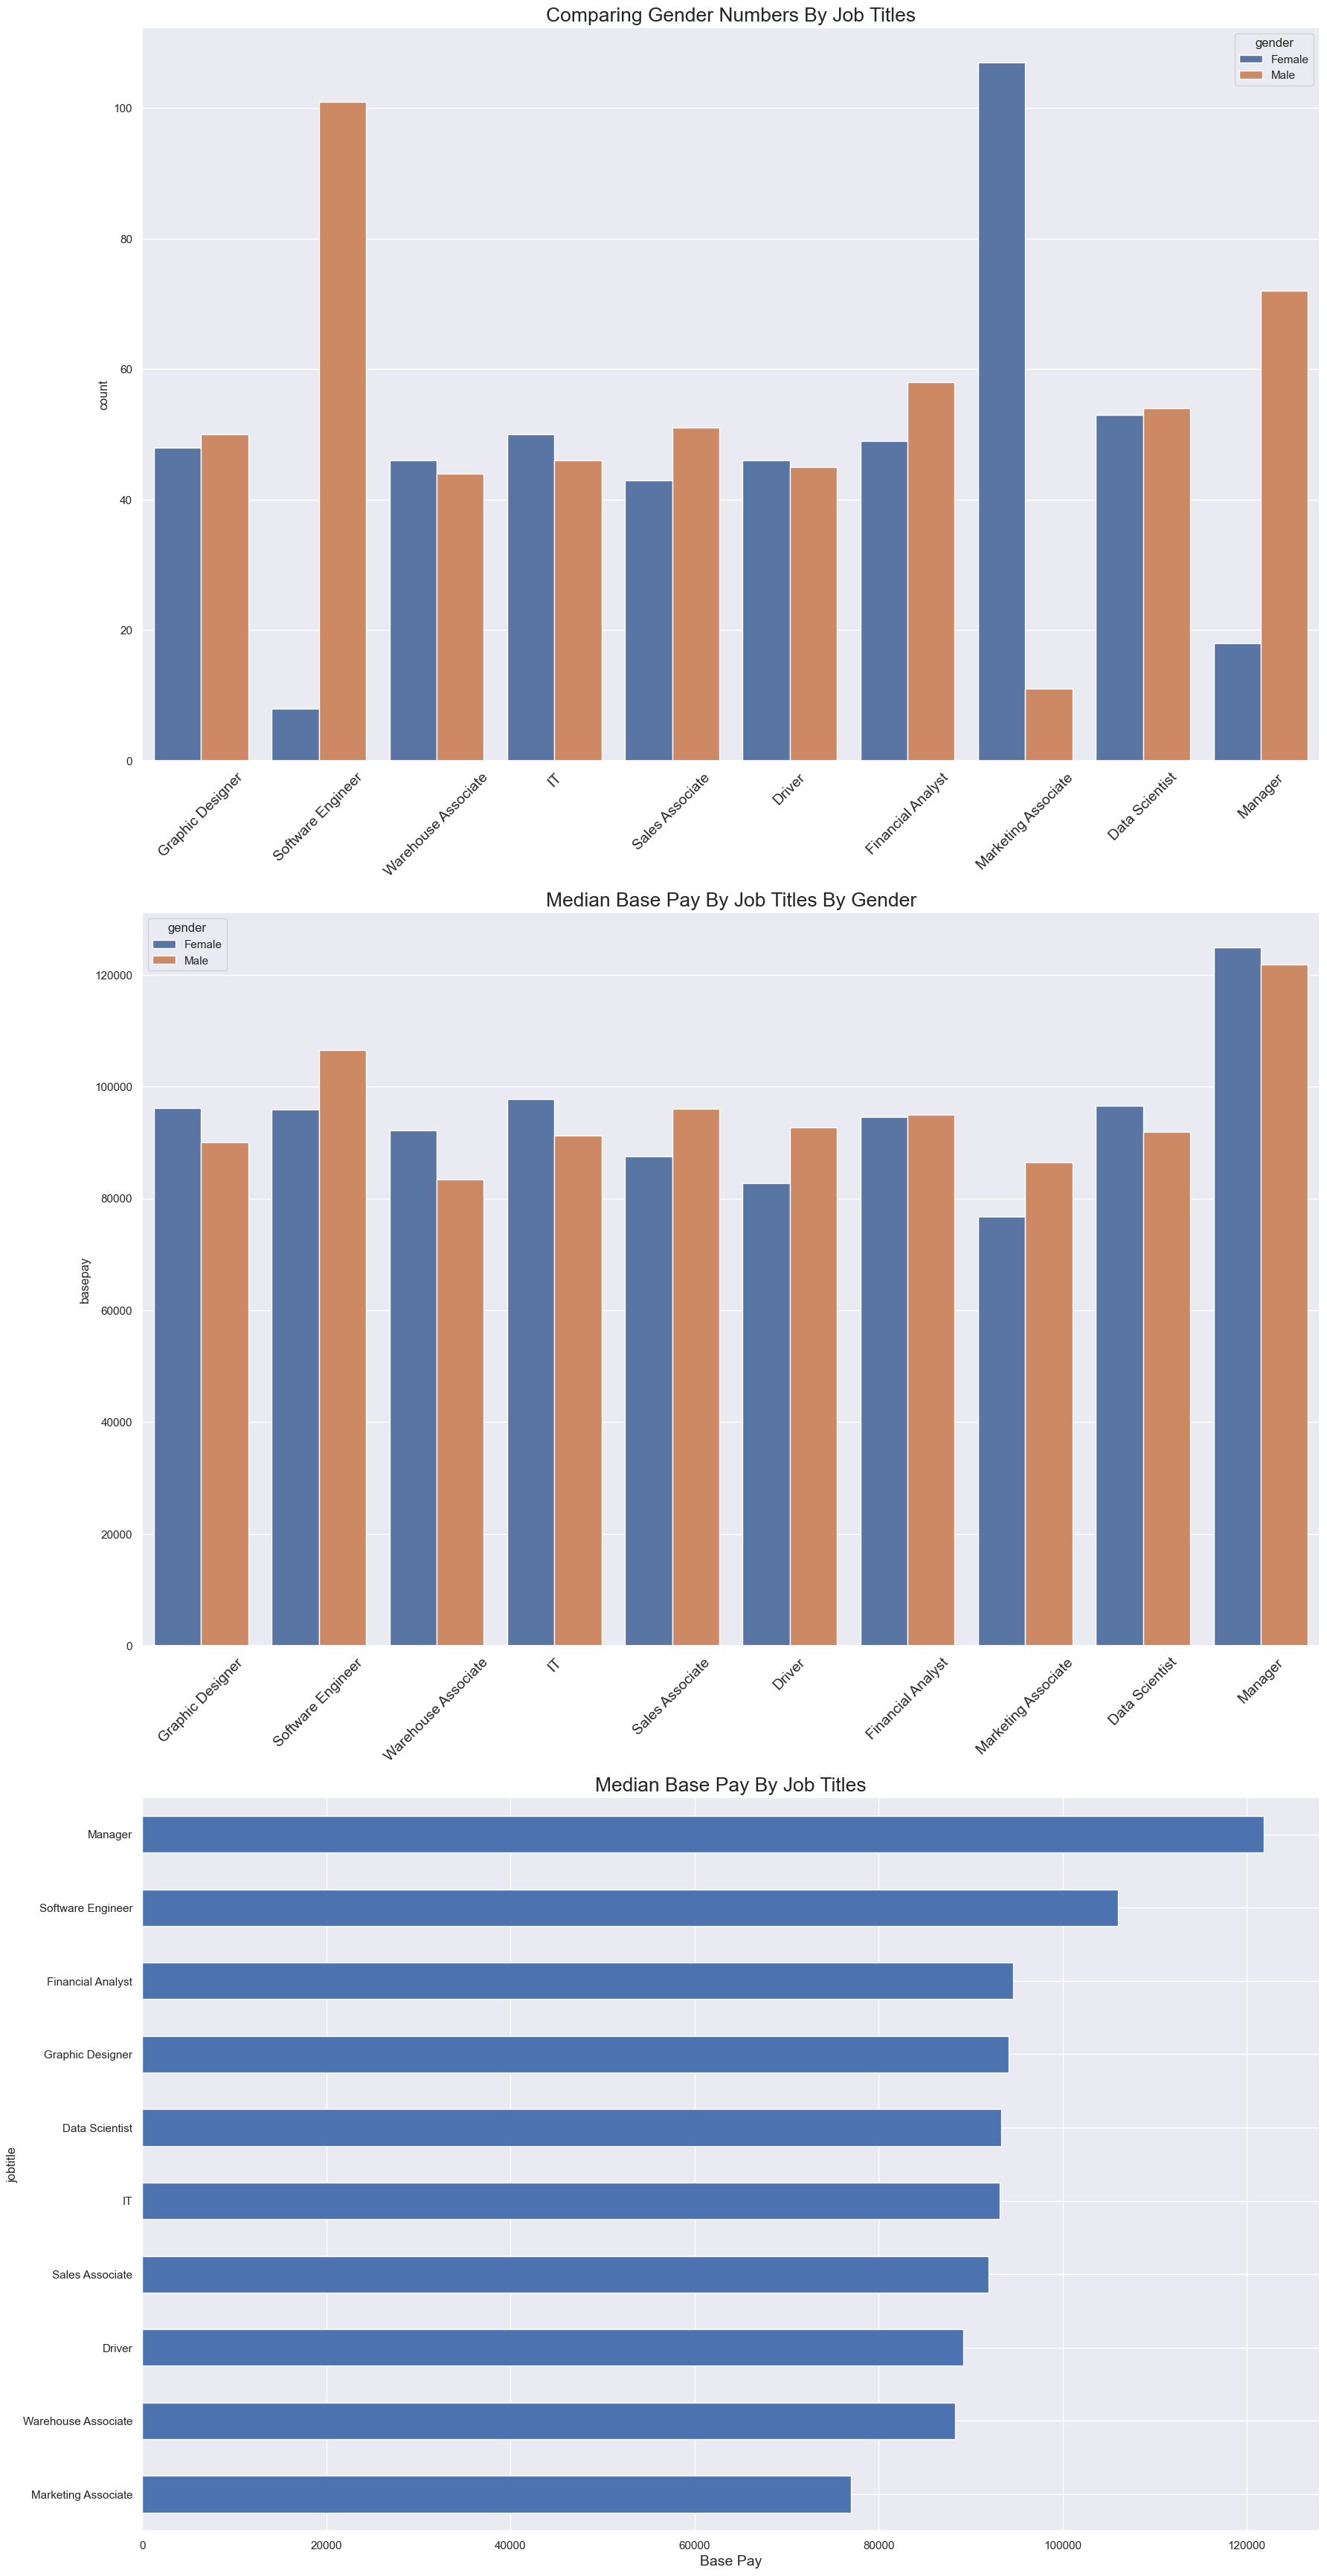

In [26]:
# plot total number of males and females by job titles

fig = plt.gcf()
fig.set_size_inches(18,70)
plt.subplot(6,1,1)

sns.countplot(data=pay, x='jobtitle', hue='gender');
locs, labels = plt.xticks();
plt.setp(labels, rotation=45, fontsize=14);
plt.title('Comparing Gender Numbers By Job Titles', fontsize=19);
plt.xlabel('');

plt.subplot(6,1,2)
sns.barplot(data=pay, x='jobtitle', y='basepay', hue='gender', estimator=np.median, ci=None);
locs, labels = plt.xticks();
plt.setp(labels, rotation=45 , fontsize=14);
plt.title('Median Base Pay By Job Titles By Gender', fontsize=19);
plt.xlabel('');


plt.subplot(6,1,3)
pay.groupby('jobtitle')['basepay'].median().sort_values().plot.barh();
plt.title('Median Base Pay By Job Titles', fontsize=19);
plt.xlabel('Base Pay', fontsize=14);


plt.tight_layout()
plt.show()

### By close examination of the data, we can see that the first 6 most highly paid jobs has males than females.  This shows occupational segregation by the dominant male group which is one of the reason for gender pay gap.  This is a sign of occupation segregation which leads to gender pay gap.  Therefore we need to do some adjustments to compare base pay based on the same age group, education, job titles etc.

In [27]:
# we will do a gender pay comparison based on these 7 occupations where there is a more balanced participation in 
# both genders

jt = ['Data Scientist', 'Graphic Designer', 'Warehouse Associate','Sales Associate', 'Financial Analyst',\
     'Driver','IT']
edu = ['PhD', 'Masters','College','High School']
start_age = 35
end_age = 54

sum = []

for w in jt:
    for k in edu:
        Req1 = (pay['jobtitle']== w) & (pay['education']==k) & (pay['age']>=start_age) & (pay['age']<=end_age)
        Req_1_compare = pay[Req1].groupby('gender')['basepay'].median()
        b = (Req_1_compare.loc['Male'] - Req_1_compare.loc['Female'])/(Req_1_compare.loc['Male'])
        case = {'jobtitle': w, 'education': k ,'diff_in_median_pay': b}
        sum.append(case)
        
summary = pd.DataFrame(sum, columns=['jobtitle','education','diff_in_median_pay'])
summary
        

,jobtitle,education,diff_in_median_pay
0,Data Scientist,PhD,0.030486
1,Data Scientist,Masters,0.038273
2,Data Scientist,College,-0.005498
3,Data Scientist,High School,0.179747
4,Graphic Designer,PhD,-0.312886
5,Graphic Designer,Masters,0.287978
6,Graphic Designer,College,0.158551
7,Graphic Designer,High School,0.007099
8,Warehouse Associate,PhD,-0.228656
9,Warehouse Associate,Masters,0.069365


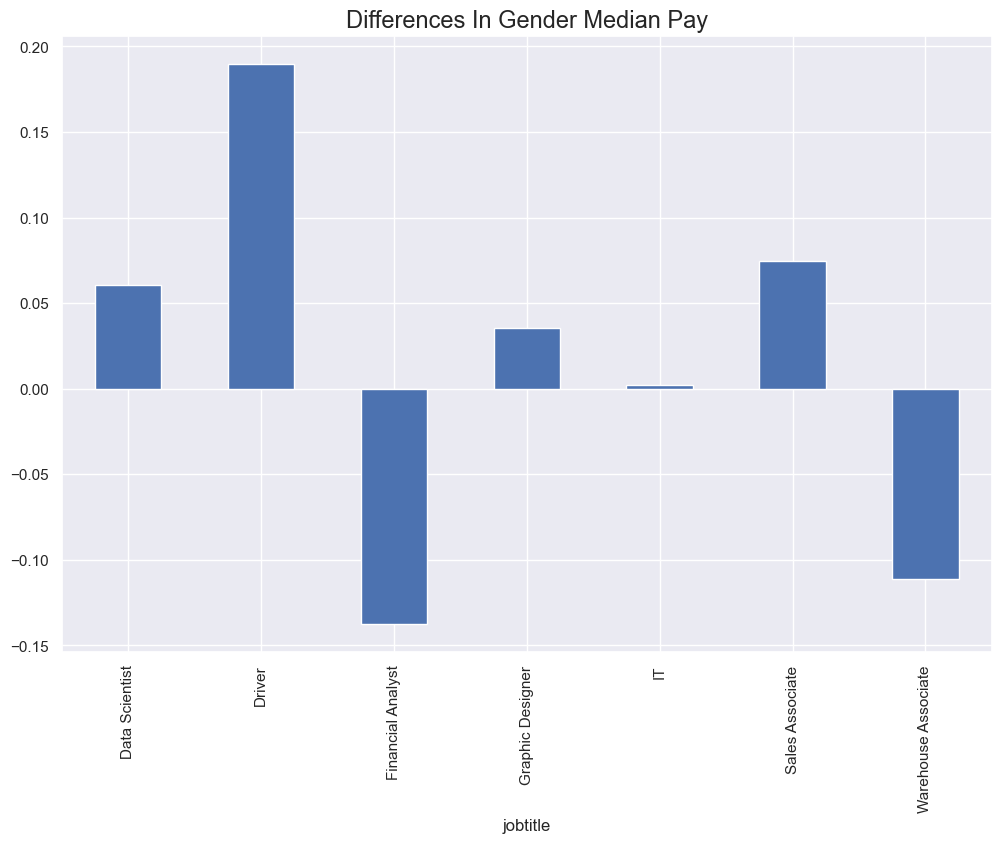

In [28]:
# average gap in median gender pay 

summary.groupby('jobtitle')['diff_in_median_pay'].mean().plot.bar();
plt.title('Differences In Gender Median Pay', fontsize=17);

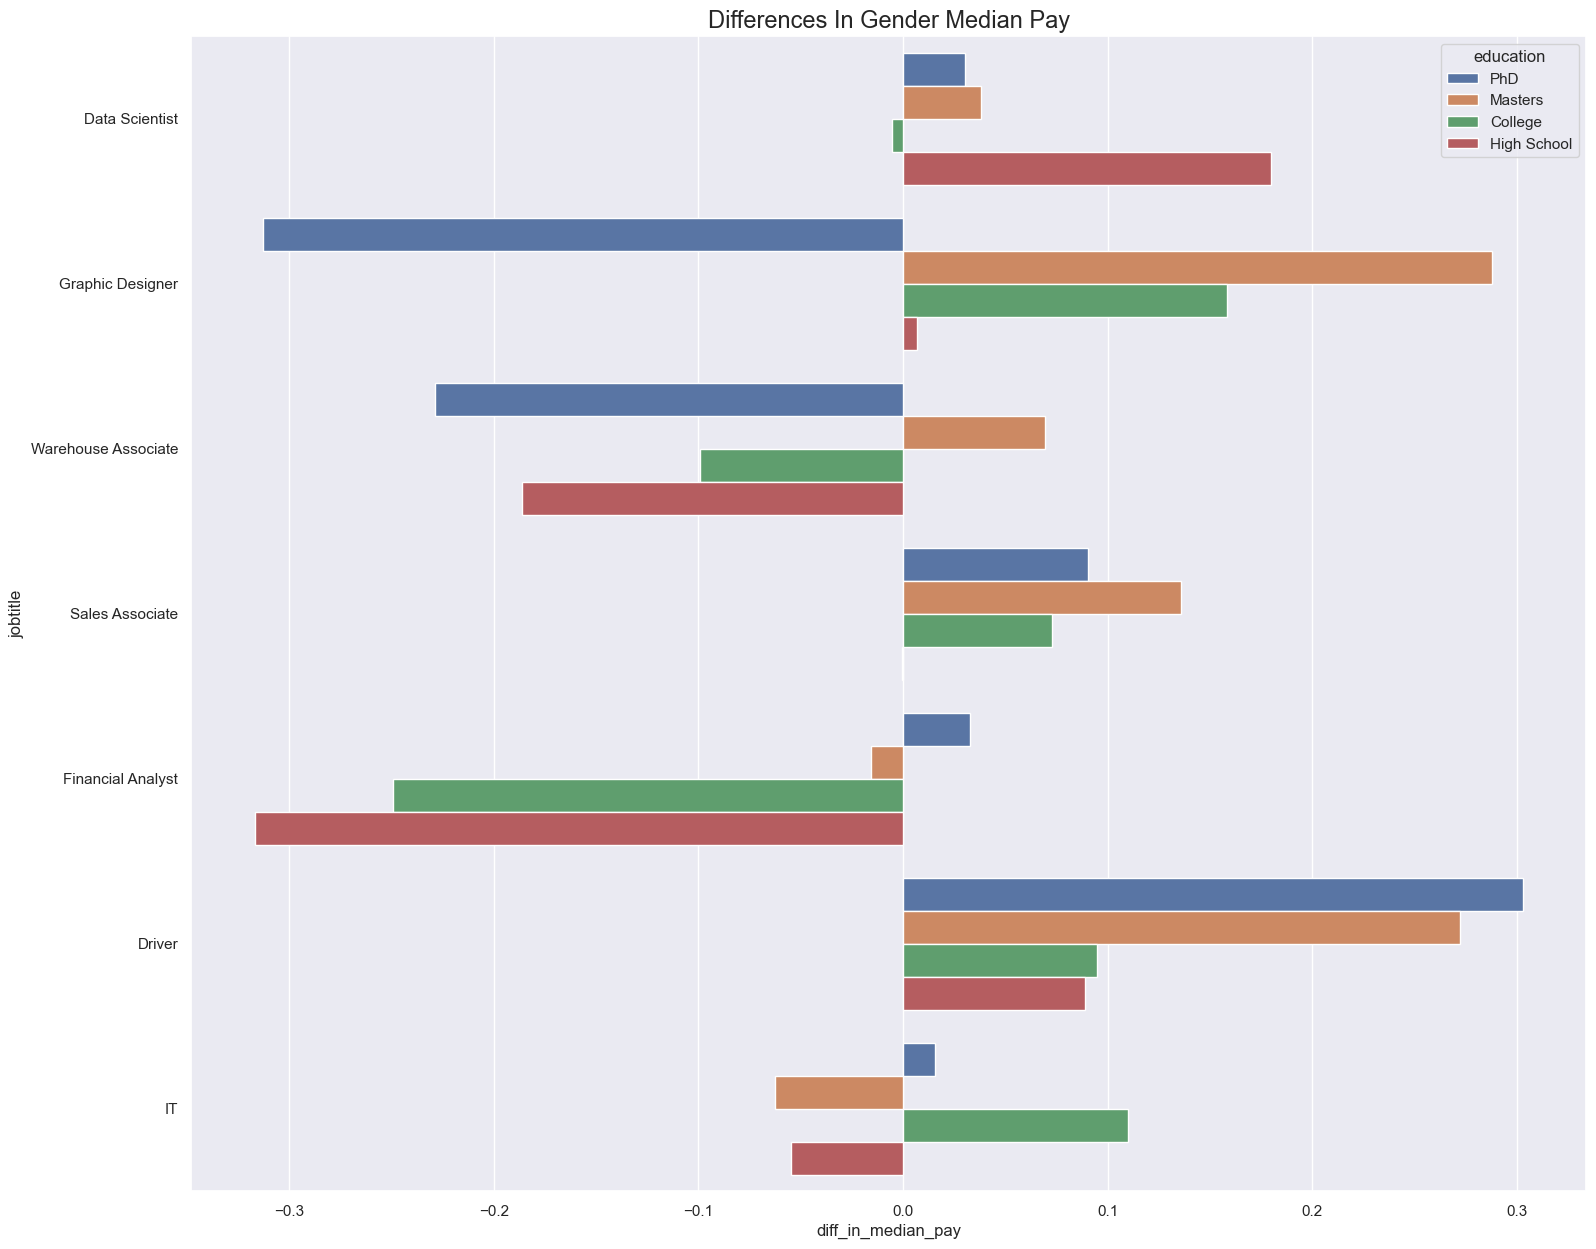

In [29]:
# average gap by jobtitle and education

fig = plt.gcf()
fig.set_size_inches(18,15)

sns.barplot(data = summary, y='jobtitle', x='diff_in_median_pay', hue='education');
plt.title('Differences In Gender Median Pay', fontsize=17);

In [30]:
# average adjusted gender pay gap

summary = round(summary['diff_in_median_pay'].mean()*100,1)
print(f"The adjusted gender pay gap is {summary}%")

The adjusted gender pay gap is 1.6%


In [31]:
jt = ['Data Scientist', 'Graphic Designer', 'Warehouse Associate','Sales Associate', 'Financial Analyst',\
     'Driver','IT']

adjusted_jobtitle = []
for i in jt:
    a = pay[pay['jobtitle']==i]
    adjusted_jobtitle.append(a)
adjusted_jobtitle=pd.concat(adjusted_jobtitle)
adjusted_jobtitle

,jobtitle,gender,age,perfeval,education,dept,seniority,basepay,bonus,gender_le,jobtitle_le,education_le
19,Data Scientist,Female,30,5,College,Engineering,5,92067,9838,0,0,0
33,Data Scientist,Female,22,5,High School,Engineering,3,74523,9972,0,0,1
34,Data Scientist,Female,45,5,PhD,Management,5,113252,10139,0,0,3
40,Data Scientist,Male,29,5,PhD,Administration,5,96355,9784,1,0,3
41,Data Scientist,Male,32,5,PhD,Management,3,87121,8703,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
963,IT,Male,55,2,Masters,Operations,1,91447,3196,1,4,2
978,IT,Female,59,1,College,Sales,3,110627,2041,0,4,0
980,IT,Male,64,1,Masters,Sales,1,92950,2125,1,4,2
984,IT,Female,53,1,High School,Administration,2,112169,2763,0,4,1


### Let's play a game, we will train the machine to identify relationship between basepay and genders (together with other fetures such as education, age, job title etc.  If the machine gets it right most of the time, you win.  Meaning, there are patterns and biases which enables the machine to predict correctly.  

In [32]:
# import Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#import sklearn confusion matrix

from sklearn.metrics import confusion_matrix

In [33]:
# import KFold

from sklearn.model_selection import KFold

X = adjusted_jobtitle.loc[:,['basepay','education_le','jobtitle_le','age']]
y = adjusted_jobtitle['gender_le']
t=10
kf = KFold(n_splits=t, random_state=2, shuffle=True)


In [34]:
# fit the Logistic Regression model and predict the score
# initialize kfold split

acc = []
conf_mat_acc = []

# prediction part
for train, test in kf.split(X):
    X_train, X_test = X.iloc[train,:], X.iloc[test,:]
    y_train, y_test = y.iloc[train], y.iloc[test]
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    # compute accuracy score for classification
    acc.append(round(np.mean(y_pred==y_test),2))
    
result = len([k for k in acc if k > 0.5])
acc_avg = np.sum(acc)/len(acc)

print(f"There are {result} out of {t} tries which are > 0.5")
print(f"The accuracy score of all {t} attempts are: {acc}")
print(f"The average accuracy score is {acc_avg:.2f}")

There are 4 out of 10 tries which are > 0.5
The accuracy score of all 10 attempts are: [0.42, 0.46, 0.52, 0.51, 0.49, 0.46, 0.47, 0.51, 0.51, 0.38]
The average accuracy score is 0.47


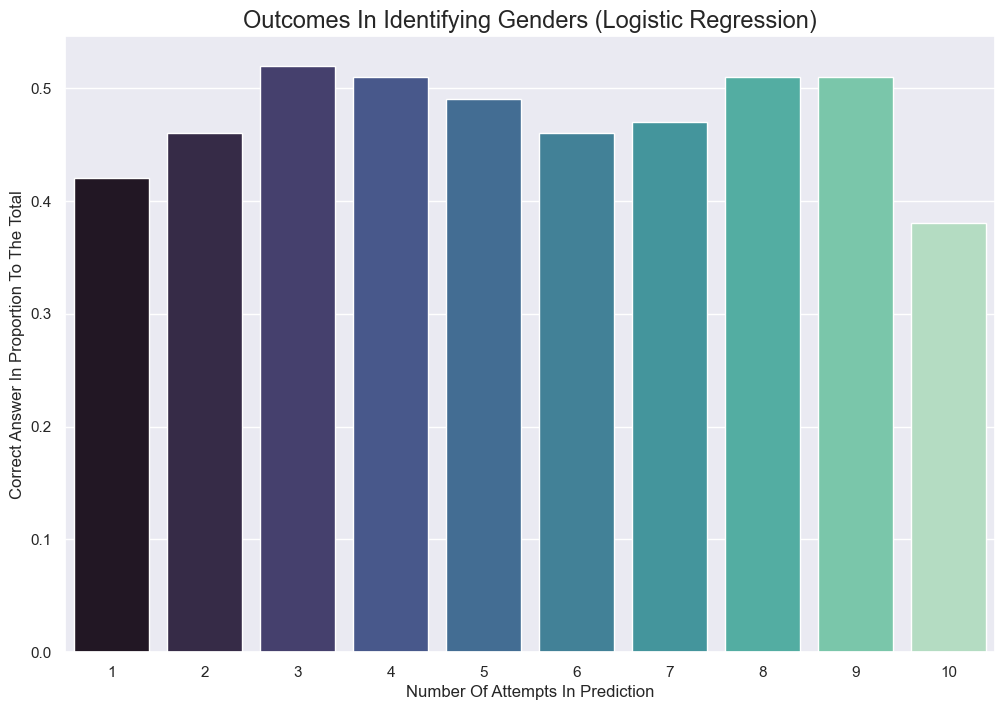

In [35]:
# plot the graph to show all the outcomes of prediction

attempts = np.arange(1,len(acc)+1)
sns.barplot(x=attempts, y=acc, palette='mako');
plt.title('Outcomes In Identifying Genders (Logistic Regression)', fontsize=17);
plt.xlabel('Number Of Attempts In Prediction' , fontsize=12);
plt.ylabel('Correct Answer In Proportion To The Total', fontsize=12);